In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("biogasdf_ready.csv", parse_dates=['date'])
df['Month'] = df['date'].dt.month
df['Hour'] = pd.to_datetime(df['hour'], format='%H:%M:%S').dt.hour

In [5]:
bio1_phase0 = df[(df['bio_id'] == 1) & (df['phase_test'] == 0)].reset_index()
bio1_phase1 = df[(df['bio_id'] == 1) & (df['phase_test'] == 1)].reset_index()
bio1_phase2 = df[(df['bio_id'] == 1) & (df['phase_test'] == 2)].reset_index()
bio1_phase3 = df[(df['bio_id'] == 1) & (df['phase_test'] == 3)].reset_index()
bio2_phase0 = df[(df['bio_id'] == 2) & (df['phase_test'] == 0)].reset_index()
bio2_phase1 = df[(df['bio_id'] == 2) & (df['phase_test'] == 1)].reset_index()
bio2_phase2 = df[(df['bio_id'] == 2) & (df['phase_test'] == 2)].reset_index()
bio2_phase3 = df[(df['bio_id'] == 2) & (df['phase_test'] == 3)].reset_index()

In [62]:
print(f"Shape : {bio1_phase0.shape}")
print('\n')
print(bio1_phase0.dm3_gas.value_counts())

Shape : (5109, 14)


0.00    5085
0.01      24
Name: dm3_gas, dtype: int64


In [61]:
print(f"Shape : {bio1_phase1.shape}")
print('\n')
print(bio1_phase1.dm3_gas.value_counts())

Shape : (10875, 14)


0.00    10710
0.01      165
Name: dm3_gas, dtype: int64


In [63]:
print(f"Shape : {bio1_phase2.shape}")
print('\n')
print(bio1_phase2.dm3_gas.value_counts())

Shape : (4919, 14)


0.00    4280
0.01     639
Name: dm3_gas, dtype: int64


In [64]:
print(f"Shape : {bio1_phase3.shape}")
print('\n')
print(bio1_phase3.dm3_gas.value_counts())

Shape : (3653, 14)


0.00    3639
0.01      14
Name: dm3_gas, dtype: int64


In [65]:
print(f"Shape : {bio2_phase1.shape}")
print('\n')
print(bio2_phase1.dm3_gas.value_counts())

Shape : (10875, 14)


0.00    10666
0.01      209
Name: dm3_gas, dtype: int64


In [66]:
df11 = bio1_phase1
df12 = bio1_phase2
df13 = bio1_phase3

In [67]:
df12.head()

,index,date,hour,fluid_temp,ground_temp,air_umidity,air_temp,gas_umidity,gas_temp,dm3_gas,bio_id,phase_test,Month,Hour
0,5109,2022-05-01,00:41:30,20.06,20.0,97.9,16.7,NaN,NaN,0.00,1,2,5,0
1,5110,2022-05-01,01:33:58,20.06,20.0,97.7,16.8,82.88,16.39,0.00,1,2,5,1
2,5111,2022-05-01,01:57:02,20.06,20.0,97.8,16.8,82.88,16.40,0.00,1,2,5,1
3,5112,2022-05-01,02:56:59,20.06,20.0,97.8,16.8,83.20,16.47,0.00,1,2,5,2
4,5113,2022-05-01,03:11:59,20.06,20.0,97.8,16.9,83.18,16.49,0.01,1,2,5,3


In [68]:
df12.isna().sum()

index             0
date              0
hour              0
fluid_temp        0
ground_temp       0
air_umidity       0
air_temp          0
gas_umidity    2239
gas_temp       2239
dm3_gas           0
bio_id            0
phase_test        0
Month             0
Hour              0
dtype: int64

In [69]:
df12.isna().sum()

index             0
date              0
hour              0
fluid_temp        0
ground_temp       0
air_umidity       0
air_temp          0
gas_umidity    2239
gas_temp       2239
dm3_gas           0
bio_id            0
phase_test        0
Month             0
Hour              0
dtype: int64

In [70]:
df12.dm3_gas.value_counts()

0.00    4280
0.01     639
Name: dm3_gas, dtype: int64

<Axes: xlabel='fluid_temp', ylabel='ground_temp'>

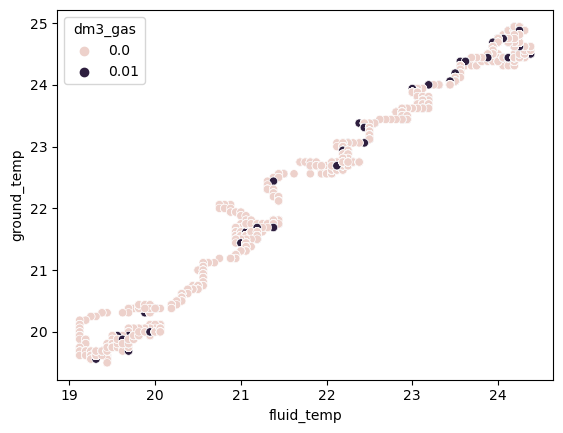

In [76]:
import seaborn as sns
sns.scatterplot(x='fluid_temp', y='ground_temp', hue='dm3_gas', data=df12)

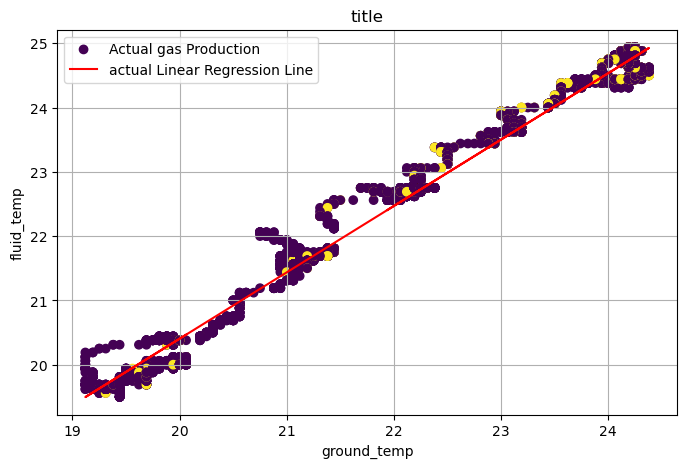

In [77]:
slope1, intercept1 = np.polyfit(df12.fluid_temp, df12.ground_temp, 1)

#1.2 for the predicted values
#slope2, intercept2 = np.polyfit(X_train, y_train, 1)
# Create the regression line equations for both actual and predicted values
plt.figure(figsize=(8,5))
regression_line1 = slope1 * df12.fluid_temp + intercept1
#regression_line2 = slope2 * x + intercept2

# Plot the data points
plt.scatter(df12.fluid_temp, df12.ground_temp, c = df12.dm3_gas, label="Actual gas Production")
#plt.scatter(x, y_pred, label="Predicted Values")

# Plot the regression line
plt.plot(df12.fluid_temp, regression_line1, color='red', label="actual Linear Regression Line")
#plt.plot(x, regression_line2, color='green', label="predicted Linear Regression Line")


# Title, labels and a legend
plt.title("title")
plt.xlabel("ground_temp")
plt.ylabel("fluid_temp")
#plt.xticks(np.arange(15,44,3))
plt.legend()
plt.grid()

# Show the plot
plt.show()